### Data source API

In [132]:
import tsv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Reading the csv file taken from the Kaggle dataset

In [121]:
df = pd.read_csv('./all_annotated.tsv', sep='\t', header=0)
df

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10497,774941788247298050,TR,2016-09-11,"I'm at @PiazzaAvym in Canik, Samsun w/ @mertar...",1,0,0,0,0,1
10498,774951242422480897,PH,2016-09-11,"El Nido, fica ao norte de Palawan, uma das ilh...",0,0,1,0,0,0
10499,774960083721531392,ID,2016-09-11,Alhamdulillah 😊👨‍👩‍👧‍👧🎂🍦makasih mah pah #lovyu...,0,0,1,0,0,0
10500,775057244798849024,NG,2016-09-11,Eid-Mubarak @ Bauchi Fedral Lowcost https://t....,0,1,0,0,1,0


Since all we want is just the Tweet, we can remove every other column from it.

In [122]:
df = df[['Tweet']]
df

,Tweet
0,Bugün bulusmami lazimdiii
1,Volkan konak adami tribe sokar yemin ederim :D
2,Bed
3,I felt my first flash of violence at some fool...
4,Ladies drink and get in free till 10:30
...,...
10497,"I'm at @PiazzaAvym in Canik, Samsun w/ @mertar..."
10498,"El Nido, fica ao norte de Palawan, uma das ilh..."
10499,Alhamdulillah 😊👨‍👩‍👧‍👧🎂🍦makasih mah pah #lovyu...
10500,Eid-Mubarak @ Bauchi Fedral Lowcost https://t....


Let's do a sample and take a look at the tweets

In [123]:
df.sample(5)

,Tweet
10178,"I'm at 伊東駅 in 伊東市, 静岡県 https://t.co/mFD5lZ1dx8"
9075,"I'm at Praça Paulo VI in Bh, Mg https://t.co/1..."
5294,Que chabon mas pesado por dios.
8725,CA high court state courts @ National Gallery ...
2911,Viva La Vida!!! - @Coldplay :)))


You notice that there are a lot of words that are not meaning like links and @tags. So here's a reminder for us to remove these characters later when we clean up the dataset.

In [124]:
import string
import re

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Notice that this code can be cleaner where I could define 3 functions to remove 3 different aspects of the string. But I put everything in one function so we just need to do one pass to obtain a clean tweet

In [168]:
def remove_non_words(tweet):
    # finally, this is to remove all the url links
    tweet = re.sub(r'^http?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)

    
    # this is to remove all the punctuations in the string
    tweet  = "".join([char for char in tweet if char not in string.punctuation])
    tweet = re.sub('[0-9]+', '', tweet)
    
    # this is to remove all the emojis in the string
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    tweet = re.sub(emoji_pattern, '', tweet)
    
    
    return tweet

Let's clean it now with the `remove_non_words` function

In [170]:
df['clean_tweets'] = df['Tweet'].apply(lambda x: remove_non_words(x))
df.sample(5)

,Tweet,clean_tweets,prediction,language,confidence
8615,Ang cute nilaaaa naghahabulan! Dogs are cuteee,Ang cute nilaaaa naghahabulan Dogs are cuteee,"(en, 0.7015410661697388)",en,0.701541
7911,At Aquanos Cafe — https://t.co/DDC4yMv7xu,At Aquanos Cafe — httpstcoDDCyMvxu,"(en, 0.5023478865623474)",en,0.502348
899,"A penis lives a sad life: His hair is a mess, ...",A penis lives a sad life His hair is a mess hi...,"(en, 0.9987828731536865)",en,0.998783
425,"Didzhalimi bkn mati,difitnah bkn punah,ditampa...",Didzhalimi bkn matidifitnah bkn punahditampar ...,"(id, 0.3158862888813019)",id,0.315886
7141,School girl #vscocam @ University of the East ...,School girl vscocam University of the East UE...,"(en, 0.7990067005157471)",en,0.799007


In [175]:
df_clean_tweets = df[['clean_tweets']]
df_clean_tweets

,clean_tweets
0,Bugün bulusmami lazimdiii
1,Volkan konak adami tribe sokar yemin ederim D
2,Bed
3,I felt my first flash of violence at some fool...
4,Ladies drink and get in free till
...,...
10497,Im at PiazzaAvym in Canik Samsun w mertarmann ...
10498,El Nido fica ao norte de Palawan uma das ilhas...
10499,Alhamdulillah ‍‍‍makasih mah pah lovyu Terras...
10500,EidMubarak Bauchi Fedral Lowcost httpstcompLk...


Since we know that tweets can be maximum of length 280 characters, it is deemed rather short. Refer to: [Twitter Documentation](https://developer.twitter.com/en/docs/counting-characters#:~:text=In%20most%20cases%2C%20the%20text,as%20more%20than%20one%20character)

Because of that we choose to use Facebook's fasttext to detect the languages of these tweets. Note that we are using a more compact model with a little bit of tradeoff of the accuracy since in the requirements we want to prioritize speed.

In [134]:
import fasttext

PRETRAINED_MODEL_PATH = './lid.176.ftz'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

Let's try it out:

In [128]:
sentences = ['je mange de la nourriture']
model.predict(sentences)

([['__label__fr']], [array([0.8510406], dtype=float32)])

Seems quite accurate for our use case. Let's go ahead with this library and define `get_language` method to be used in a lambda function:

In [129]:
def get_language(tweet):
    y = model.predict(tweet)
    return(y[0][0].replace('__label__', ''), y[1][0])

We create a new column called prediction that houses the language and confidence, then modularize them into another two columns.

In [176]:
df_clean_tweets['prediction'] = df_clean_tweets['clean_tweets'].apply(lambda x : get_language(x))
df_clean_tweets

,clean_tweets,prediction
0,Bugün bulusmami lazimdiii,"(tr, 0.617526113986969)"
1,Volkan konak adami tribe sokar yemin ederim D,"(tr, 0.3083454370498657)"
2,Bed,"(fr, 0.3232821524143219)"
3,I felt my first flash of violence at some fool...,"(en, 0.9772645831108093)"
4,Ladies drink and get in free till,"(en, 0.6527988910675049)"
...,...,...
10497,Im at PiazzaAvym in Canik Samsun w mertarmann ...,"(en, 0.6175498366355896)"
10498,El Nido fica ao norte de Palawan uma das ilhas...,"(pt, 0.9085416793823242)"
10499,Alhamdulillah ‍‍‍makasih mah pah lovyu Terras...,"(id, 0.29211729764938354)"
10500,EidMubarak Bauchi Fedral Lowcost httpstcompLk...,"(pl, 0.28050297498703003)"


In [178]:
df_clean_tweets['language'] = df_clean_tweets['prediction'].apply(lambda x : x[0])
df_clean_tweets['confidence'] = df_clean_tweets['prediction'].apply(lambda x : x[1])
df_clean_tweets.sample(5)

,clean_tweets,prediction,language,confidence
765,Ya he llegado,"(es, 0.6398690342903137)",es,0.639869
6347,She said eat the booty out like groceries I do...,"(en, 0.9885510206222534)",en,0.988551
7996,All are sinners in the eyes of the lord Kent ...,"(en, 0.816457986831665)",en,0.816458
3614,Nice spot Good food great drinks Winflo Oster...,"(en, 0.4719156324863434)",en,0.471916
1224,Wanna se me fall,"(fr, 0.20682010054588318)",fr,0.206820


Now let's only take the relatively more confidently predicted tweets since we have an abundance of tweets to choose from.

In [179]:
df_confident = df_clean_tweets[df_clean_tweets['confidence'] > 0.5]
df_confident.sample(5)

,clean_tweets,prediction,language,confidence
1695,CrystalYi cmmarqua before and after soon,"(en, 0.8793606758117676)",en,0.879361
3118,mentally physically and emotionally unsatisfied,"(en, 0.8947592377662659)",en,0.894759
2159,KymiFowler technically freshman and a half Sum...,"(en, 0.8528209924697876)",en,0.852821
4358,Ainda bem que foi só segunda,"(pt, 0.994597852230072)",pt,0.994598
8055,Chaaauuu playitaa por qué justo un día así me ...,"(es, 0.871193528175354)",es,0.871194


The amount of tweets we have that has a language prediction confidence of more than 50%:

In [137]:
len(df_confident)

7375

The amount of tweets in English:

In [180]:
df_confident[df_confident['language'] == 'en']

,clean_tweets,prediction,language,confidence
3,I felt my first flash of violence at some fool...,"(en, 0.9772645831108093)",en,0.977265
4,Ladies drink and get in free till,"(en, 0.6527988910675049)",en,0.652799
7,Watching Miranda On bbc mermhart u r HILARIOUS,"(en, 0.5819909572601318)",en,0.581991
9,Shopping Kohls httptcoIZkQHT,"(en, 0.5320528745651245)",en,0.532053
16,Dennycrowe all over twitter because you and yo...,"(en, 0.768022358417511)",en,0.768022
...,...,...,...,...
10492,Another Cardigan Records Hopscotch Day Party i...,"(en, 0.920673131942749)",en,0.920673
10493,Im at Hempstead Hair World in Elmont NY httpst...,"(en, 0.5241799354553223)",en,0.524180
10494,Bachelorette Laurita Winery httpstcoBsIIFmdGz,"(en, 0.6609522104263306)",en,0.660952
10496,This job might be a great fit for you Sr Infor...,"(en, 0.6981475949287415)",en,0.698148


Number of languages we have in this dataset:

In [181]:
len(set(df_confident['language']))

55

In [148]:
import matplotlib

In [182]:
lang_count = df_confident.language.value_counts()
lang_count

en     4312
es      810
pt      728
tr      265
fr      211
ru      175
id      173
th      142
ar      117
it       71
de       69
nl       64
tl       32
sv       26
fi       22
pl       17
ca       15
ms       13
no        7
eo        7
uk        7
ceb       6
cs        6
et        5
fa        5
fy        4
lv        4
hu        4
ro        4
el        3
eu        3
sw        3
da        3
gl        3
ta        3
vi        2
he        2
sk        2
ga        2
hi        2
lb        2
zh        2
az        2
mn        2
arz       2
sr        1
be        1
ja        1
su        1
jbo       1
af        1
br        1
jv        1
la        1
nds       1
Name: language, dtype: int64

Let's visualize the distribution of the Tweets' language with a bar chart and a pie chart:

<AxesSubplot:>

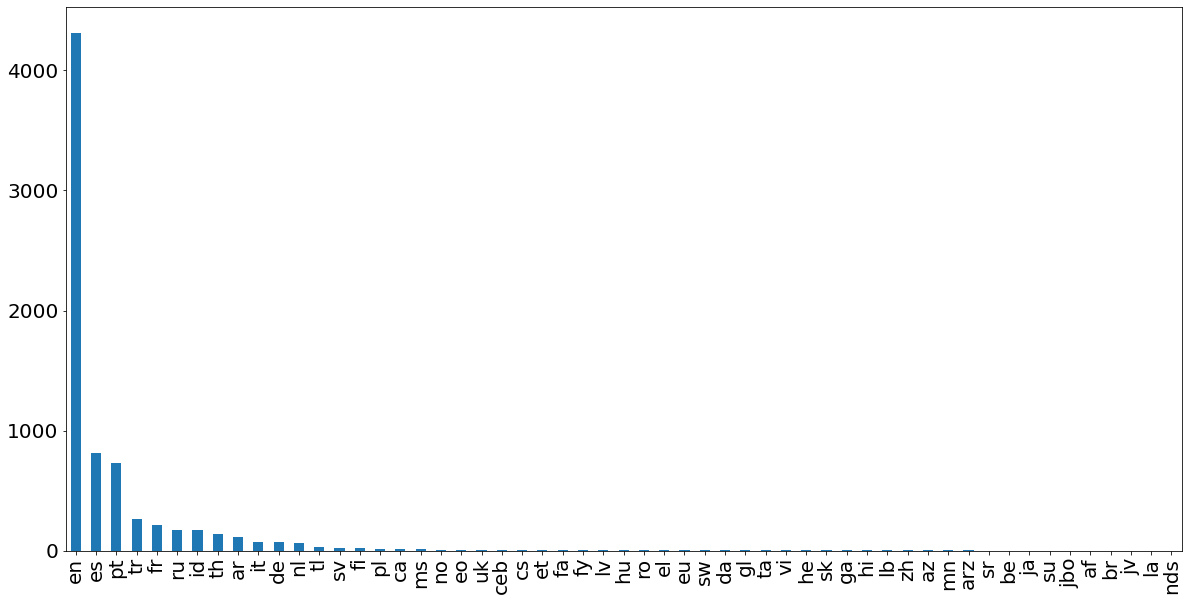

In [183]:
lang_count.plot.bar(figsize=(20,10), fontsize=20)


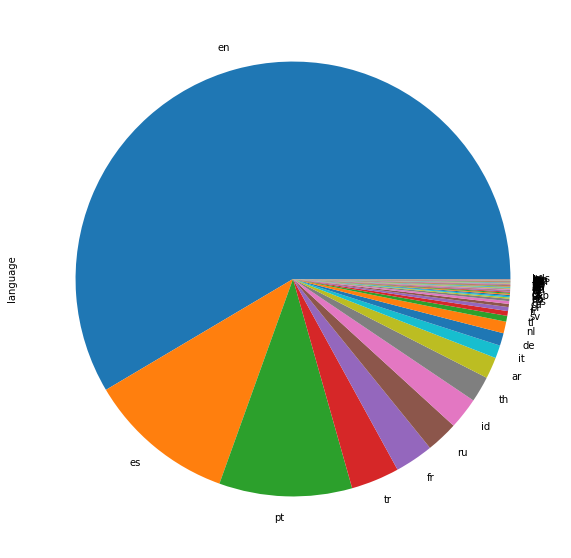

In [184]:
plot = lang_count.plot.pie(y='count', figsize=(10, 10))


For demonstration purposes, we can start with English, Spanish and Portugese, as they have the highest number of tweets in the dataset: 4316, 810 and 729 respectively.

Let's export the cleaned tweets according to their languages to a dir called `/clean_data`

In [185]:
import os

language_list = ['en', 'es', 'pt']

clean_data_dir = './clean_data'
if not os.path.exists(clean_data_dir):
    os.mkdir(clean_data_dir)

for language in language_list:
    df_lang = df_confident[df_confident['language'] == language]
    fulldir = os.path.join(clean_data_dir, language + '.csv')   
    df_lang.to_csv(fulldir)